In [ ]:
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import random
sns.set_theme()

class HMM(torch.nn.Module):
  """
  Hidden Markov Model with discrete observations.
  """
  def __init__(self, M, N):
    super(HMM, self).__init__()
    self.M = M # number of possible observations
    self.N = N # number of states

    # A
    self.transition_model = TransitionModel(self.N)

    # b(x_t)
    self.emission_model = EmissionModel(self.N,self.M)

    # pi
    self.unnormalized_state_priors = torch.nn.Parameter(torch.randn(self.N))

class TransitionModel(torch.nn.Module):
  def __init__(self, N):
    super(TransitionModel, self).__init__()
    self.N = N
    self.unnormalized_transition_matrix = torch.nn.Parameter(torch.randn(N,N))

class EmissionModel(torch.nn.Module):
  def __init__(self, N, M):
    super(EmissionModel, self).__init__()
    self.N = N
    self.M = M
    self.unnormalized_emission_matrix = torch.nn.Parameter(torch.randn(N,M))

In [ ]:
def sample(self, T=10):
  # Pass the parameters with softmax layer to get probability
  state_priors = torch.nn.functional.softmax(self.unnormalized_state_priors, dim=0)
  transition_matrix = torch.nn.functional.softmax(self.transition_model.unnormalized_transition_matrix, dim=0)
  emission_matrix = torch.nn.functional.softmax(self.emission_model.unnormalized_emission_matrix, dim=1)

  # sample initial state
  z_t = torch.distributions.categorical.Categorical(state_priors).sample().item()
  z = []; x = []
  z.append(z_t)
  for t in range(0,T):
    # sample emission
    ########## [TODO](Hint: use emission matrix) ##########
    x_t = torch.distributions.categorical.Categorical(emission_matrix[z[t]]).sample().item()

    #############################
    x.append(x_t)

    # sample transition
    ########## [TODO](Hint: use transition matrix) ##########
    z_t = torch.distributions.categorical.Categorical(transition_matrix[z[t]]).sample().item()

    #############################
    if t < T-1: z.append(z_t)

  return x, z

# Add the sampling method to our HMM class
HMM.sample = sample

State priors:


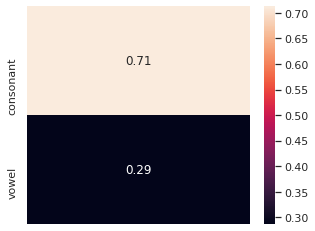

Emission matrix:


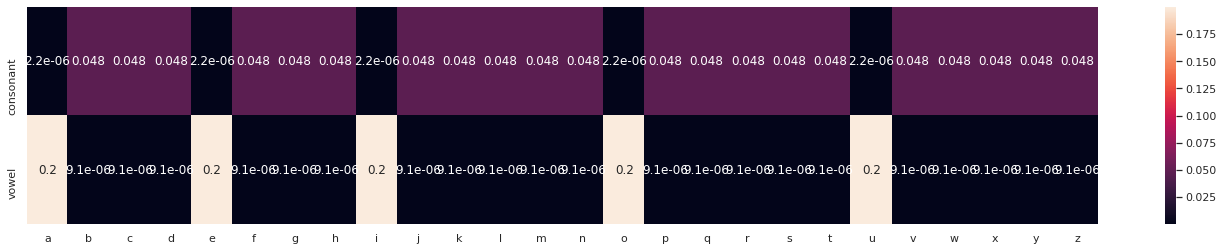

RuntimeError: ignored

In [155]:
# Initialize the model
# The parameters are actually trainable with EM algorithm,
# but we do not implement it in this lab.
alphabet = string.ascii_lowercase
model = HMM(M=len(alphabet), N=2) 
for p in model.parameters():
    p.requires_grad = False 
# Let state 0 = consonant, state 1 = vowel
sns.set(rc={'figure.figsize':(5,4)})
########## [TODO] (Hint: consider prior) ##########
tem_a = random.uniform(0.8,1)
tem_b = 1-tem_a
model.unnormalized_state_priors = torch.nn.Parameter(torch.tensor([tem_a,tem_b]))
for p in model.parameters():
    p.requires_grad = False 
###################################################
print("State priors:")

sns.heatmap(torch.nn.functional.softmax(model.unnormalized_state_priors, dim=0).unsqueeze(-1).numpy(),
            xticklabels=False,
            yticklabels=['consonant','vowel'],
            annot=True)
plt.show()


# In state 0, only allow consonants; in state 1, only allow vowels
sns.set(rc={'figure.figsize':(24,4)})
########## [TODO] (Hint: consider emission_model) ##########
model.emission_model.unnormalized_emission_matrix = torch.nn.Parameter(torch.tensor([[0.,10.,10.,10.,0.,10.,10.,10.,0.,10.,10.,10.,10.,10.,0.,10.,10.,10.,10.,10.,0.,10.,10.,10.,10.,10.],[10.,0.,0.,0.,10.,0.,0.,0.,10.,0.,0.,0.,0.,0.,10.,0.,0.,0.,0.,0.,10.,0.,0.,0.,0.,0.]]))

for p in model.parameters():
    p.requires_grad = False 
############################################################
print("Emission matrix:")
sns.heatmap(torch.nn.functional.softmax(model.emission_model.unnormalized_emission_matrix, dim=1).numpy(),
            xticklabels=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'],
            yticklabels=['consonant','vowel'],
            annot=True)
plt.show()


# Only allow vowel -> consonant and consonant -> vowel
sns.set(rc={'figure.figsize':(5,4)})
########## [TODO] (Hint: consider transition model) ##########
model.transition_model.unnormalized_transition_matrix = torch.nn.Parameter(torch.tensor([[0,10.],[10.,0]]))
for p in model.parameters():
    p.requires_grad = False 
#####################################################
print("Transition matrix:")
sns.heatmap(torch.nn.functional.softmax(model.transition_model.unnormalized_transition_matrix, dim=0).numpy(),
            xticklabels=['consonant','vowel'],
            yticklabels=['consonant','vowel'],
            annot=True)
plt.show()

In [ ]:
def encode(s):
  """
  Convert a string into a list of integers
  """
  x = [alphabet.index(ss) for ss in s]
  return x

def decode(x):
  """
  Convert list of ints to string
  """
  s = "".join([alphabet[xx] for xx in x])
  return s

# Sample some outputs
for _ in range(4):
  sampled_x, sampled_z = model.sample(T=5)
  print("x:", decode(sampled_x))
  print("z:", sampled_z)

x: aneye
z: [1, 0, 1, 0, 1]
x: bijam
z: [0, 1, 0, 1, 0]
x: ijaqi
z: [1, 0, 1, 0, 1]
x: qocoh
z: [0, 1, 0, 1, 0]
